# 1. Классическая теория вероятностей
## Вопрос 1
На шахматной доске азмера n x n сучайно размещают n ладей. Найти вероятность:
А = {Ладьи не бьют друг друга} ;
B = {Ладьи не бьют друг друга и на гланой диагонали нет фигур}


P(A) = m / M , где m - количество размещений, когда ладьи не бьют друг друга (не расположены на одинаковых горизонтальных и вертикальных осях), M - количество возможных вариантов размещений. При этом ладьи считаем безликими.

Количество способов расположить 1 ладью это n**2. Количество способов расположить вторую ладью это (n**2 - 1). И т.д.
Количество способов расположить n ладей - это произведение (n**2) * (n**2 - 1) * ... * (n**2 - n)
Посчитаем, сколько есть комбинаций расположения n ладей на поле размером n*n . Это и будет М

In [81]:
def chess_comb(dimensions):
    """функция принимает количество сторон кваратной шахматной доски n и 
    возвращает количество вариантов размещения n одинаковых фигур на ней.
    Фигуры одинакове, не пронумерованные, поэтому в ответе общее количество вариантов (answer) делим на количество фигур n"""
    n = dimensions
    m = 0
    values = []
    while m < n:
        value = n**2 - m
        values.append(value)
        m += 1
    
    answer = 1
    for value in values:
        answer *= value
    return int(answer/n)

In [82]:
# проверим для 8
chess_comb(8)

22307873454720

In [83]:
# проверим себя еще раз
(64*63*62*61*60*59*58*57)/8

22307873454720.0

In [84]:
# проверим для 2. Для поля 2 на 2 можем две фигуры расположить по бокам (4 варианта) и по диагоналям (2 варианта), больше никак.
# итого должно получиться 6
#перестановка фигур местами (рокировка) не считается, т.к.для нас фигуры одинаковые.
chess_comb(2)

6

In [85]:
# Найдем m. Это количество способов расположить ладьи так,
# чтобы они не урожали друг другу. Занимая какую-то вертикаль ладьей, наше количество доступных вертикалей уменьшается на 1.
# По правилу произведения для доски 8 на 8 это будет 8*7*6*5*4*3*2*1 = 40320. В общем случае n!
# Посчитаем P(A) = m / M
# для того, чтобы не придумывать функцию факториала импортируем модуль math
import math


In [88]:
math.factorial(8)

40320

In [86]:
def prob(n):
    return math.factorial(n) / chess_comb(n)

In [87]:
# для доски 8 на 8 и восьми ладей вероятность расположения, когда ладьи не бьют друг друга очень маленькая
prob(8)

1.807433598807192e-09

In [89]:
# Найдем вероятность B = {Ладьи не бьют друг друга и на гланой диагонали нет фигур}
# исключая возможность размещения на главных диагоналях теряем половину вариантов размещения и два варианта с размещением на какой-либо из двух диагноалей.
# таким образом число вариантов размещения будет
# (math.factorial(n)/2) - 2
# а функция вычисления вероятности примет вид
def prob_without_diagonal(n):
    return ((math.factorial(n)/2) - 2) / chess_comb(n)

In [90]:
#посчитаем для обычной доски:
prob_without_diagonal(8)

9.036271449592108e-10

## Вопрос 2
Брошено 3 игральных кости. Найти вероятность того, что на всех костях выпала шестерка при условии, что:
    а. по крайней мере на одной кости выпала шестерка;
    b. по крайней мере на двух костях выпало равное количество очков.

a

In [5]:
# имеем дело с условной вероятностью
# Событие А - на всех костях выпали шестерки. Вероятность такого события: 1/6 * 1/6 * 1/6
PA = 1/6 ** 3
PA

0.004629629629629629

In [6]:
# событие В - на какой-то одной кости из трех брошенных выпало 6 очков
PB = 1/6 + 1/6 + 1/6
PB

0.5

b

In [13]:
# C - событие, когда хотя бы на одной из трех костей выпала шестерка (1/6 + 1/6 + 1/6 = 1/2) и  
# на двух других костях выпали одинаковые цифры 1/6 * 1/6 = 1/36
PC = 1/2 + 1/36 # = 19/36
PC

0.5277777777777778

## Вопрос 3
В некоторой популяции до 60 лет доживает 50% , а до 80 лет - 20%. Какова вероятность, что случайно выбранный 60-летний представитель 
популяции доживет до 80 лет?

In [95]:
# События являются зависимыми:
# А - дожитие до 80 лет
# В - дожитие до 60 лет

# используем формулу условной вероятности
# P(A|B) = P(AB)/P(B) = 20% / 50% = 40%

In [97]:
0.2 / 0.5

0.4

## Вопрос 4
На заводе обуви производится 3 типа моделей. Вероятность того, что первая модель некачественная - 0.1 , вторая - 0.2 , 
третья - 0.15.
а. Какова вероятность, что случайная пара окажется качественной? b. Какова вероятность того, что выбранная случайная некачественная пара окажется второй модели?

In [14]:
# событие А - случайная пара обуви качественная. Вероятность встретить брак (обратное событие) равна сумме вероятностей 
# брака каждой модели, 
# помноженной на вероятность эту модель встретить:
P_no_A = 0.1 * 0.4 + 0.2 * 0.3 + 0.15 * 0.3
P_no_A

0.14500000000000002

In [16]:
# вероятность А
PA = 1 - P_no_A
PA

0.855

In [112]:
# События являются зависимыми:
# А - бракованная пара является второй моделю
# В - натолкнулись на брак

# используем формулу условной вероятности
# P(A|B) = P(B|A) * P(A)/P(B), где
# P(A|B) - Вероятность наступления события А при условии события В
# P(B|A) - Вероятность наступления события B при условии события A
1 * 

In [17]:
(0.2*0.3) / (1 - Out[16])

0.4137931034482758

# 2. Распределения
## Вопрос 1
Какие из приведенных величин скорее всего можно моделировать с помощью рапределения Пуассона?

b. Количество людей в очереди на кассу в супермаркете

c. Количество изюма в булочках

e. Точное время прихода на работу

`Ответ:` распределение Пуассона используется, когда проведена серия испытаний и нужно определить, с какой частотой встречается то или иное благоприятное событие.

## Вопрос 2
Постройте графики плотностей и функций распределения для:

а. Распределения Пуассона

b. Экспоненциального распределения (sts.expon)

с. Любого на выбор, которое не проходили

Для каждого распределения поэкспериментируйте с выбором параметров и изобразите их на одном графике, не забывая про легенду и подписи осей.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # библиотека для задания случайных величин
from scipy.stats import poisson
%matplotlib inline

In [20]:
mu = 50.0

# зададим нормально распределенную по Пуассону случайную величину
poisson_dist = sts.poisson(mu) # sts.norm создает случайную величину

# сгенерируем 20 значений
poisson_dist.rvs(size=20)

array([64, 71, 45, 72, 46, 63, 54, 55, 67, 53, 52, 49, 50, 53, 44, 53, 44,
       48, 39, 57])

Text(0.5,0,'$x$')

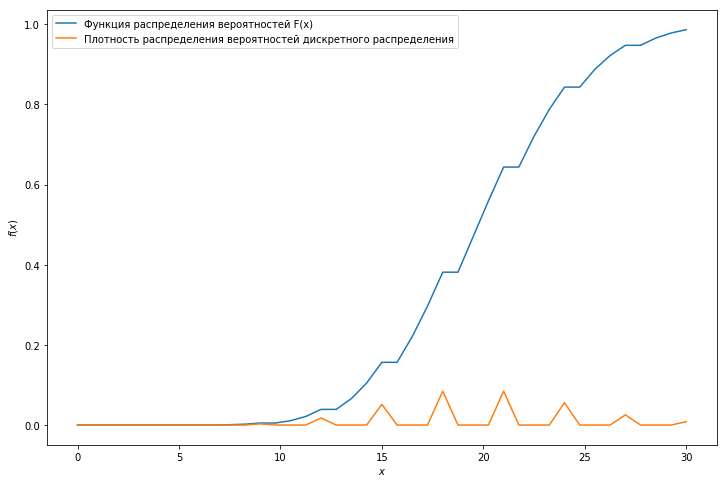

In [23]:
###### построим график распределения вероятностейи плотности распределения
mu = 20.0

poisson_dist = sts.poisson(mu)
x = np.linspace(0,30,41)
cdf = poisson_dist.cdf(x) # функция может принимать и вектор (x). pdf сторит графики плотности
pmf = poisson_dist.pmf(x)
plt.figure(figsize=(12,8))

plt.plot(x,cdf)
plt.plot(x,pmf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.legend(['Функция распределения вероятностей F(x)', 'Плотность распределения вероятностей дискретного распределения'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Теперь экспоненциальная функция

In [24]:
mu = 50.0

# зададим нормально распределенную по экспоненте случайную величину
expon_dist = sts.expon(mu) 

# сгенерируем 20 значений
expon_dist.rvs(size=20)

array([51.19015759, 50.96347822, 50.27053923, 50.69025041, 52.7718224 ,
       50.91966026, 50.22061329, 52.60505398, 51.27251191, 52.33666365,
       50.72067071, 50.3136451 , 50.76757921, 50.77863887, 50.17582875,
       50.5922726 , 50.22002633, 51.58329127, 50.18163187, 51.97247406])

Text(0.5,0,'$x$')

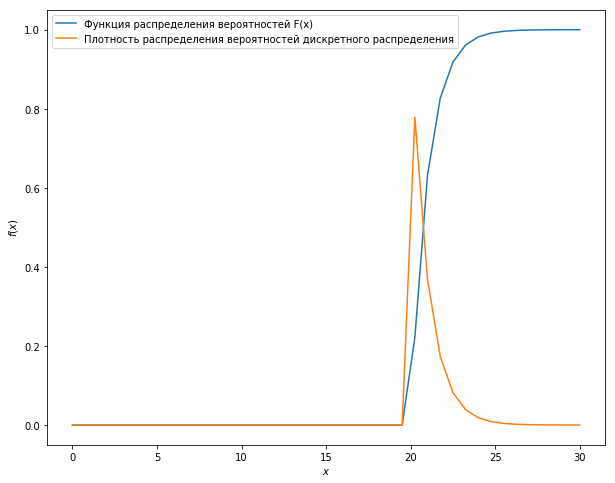

In [28]:
# построим график
mu = 20

expon_dist = sts.expon(mu) 
x = np.linspace(0,30,41)
cdf = expon_dist.cdf(x)
pdf = expon_dist.pdf(x)
plt.figure(figsize=(10,8))

plt.plot(x,cdf)
plt.plot(x,pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.legend(['Функция распределения вероятностей F(x)', 'Плотность распределения вероятностей дискретного распределения'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [ ]:
# строим все на одном графике функции распределения

Text(0.5,0,'$x$')

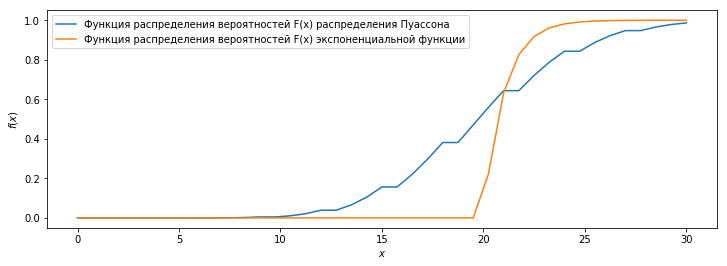

In [31]:
mu = 20.0

poisson_dist = sts.poisson(mu)
expon_dist = sts.expon(mu) 
x = np.linspace(0,30,41)
cdf = poisson_dist.cdf(x) # функция может принимать и вектор (x). pdf сторит графики плотности
cdf2 = expon_dist.cdf(x)
plt.figure(figsize=(12,4))

plt.plot(x,cdf)
plt.plot(x,cdf2)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.legend(['Функция распределения вероятностей F(x) распределения Пуассона', 'Функция распределения вероятностей F(x) экспоненциальной функции'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


In [ ]:
# строим на другом графике плотности распределения вероятностей

Text(0.5,0,'$x$')

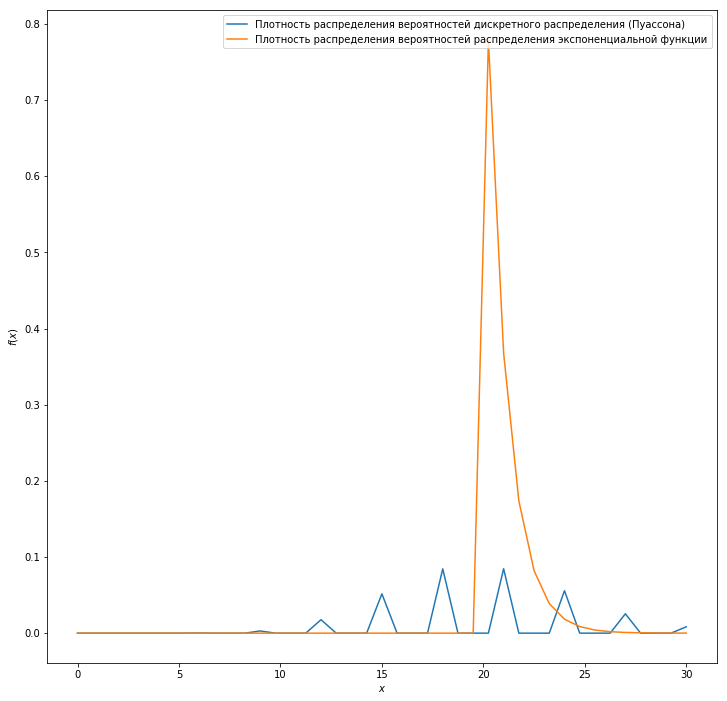

In [39]:
mu = 20.0

poisson_dist = sts.poisson(mu)
expon_dist = sts.expon(mu) 
x = np.linspace(0,30,41)
pmf = poisson_dist.pmf(x)
pdf2 = expon_dist.pdf(x)
plt.figure(figsize=(12,12))

plt.plot(x,pmf)
plt.plot(x,pdf2)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.legend(['Плотность распределения вероятностей дискретного распределения (Пуассона)', 'Плотность распределения вероятностей распределения экспоненциальной функции'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
